# Simple Linear models in Keras

In [1]:
import theano
from theano.sandbox import cuda
theano.sandbox.cuda.use("gpu0")

/home/irashadow/.pyenv/versions/miniconda-3.9.1/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:541: UserWarning: Theano flag device=gpu* (old gpu back-end) only support floatX=float32. You have floatX=float64. Use the new gpu back-end with device=cuda* for that value of floatX.
  warnings.warn(msg)
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 4007)


In [20]:
%matplotlib inline
import utils; reload(utils)
from utils import *

Using Theano backend.


In [13]:
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
import numpy as np
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)



In [9]:
def lin(a,b,x): return a*x+b

In [10]:
a=3.
b=8.

In [14]:
n=30
x = random(n)
y = lin(a,b,x)

In [15]:
x

array([ 0.3168,  0.8778,  0.8688,  0.2026,  0.6499,  0.6711,  0.4811,  0.2647,  0.4799,  0.5152,
        0.8802,  0.4506,  0.6374,  0.3989,  0.0717,  0.0658,  0.0579,  0.5848,  0.58  ,  0.304 ,
        0.0517,  0.5289,  0.0626,  0.5352,  0.6891,  0.419 ,  0.9092,  0.518 ,  0.2401,  0.4963])

In [16]:
y

array([  8.9503,  10.6333,  10.6064,   8.6078,   9.9496,  10.0132,   9.4434,   8.7942,   9.4396,
         9.5455,  10.6405,   9.3517,   9.9123,   9.1966,   8.2151,   8.1973,   8.1736,   9.7544,
         9.7401,   8.9119,   8.1551,   9.5867,   8.1877,   9.6056,  10.0674,   9.2569,  10.7277,
         9.554 ,   8.7203,   9.489 ])

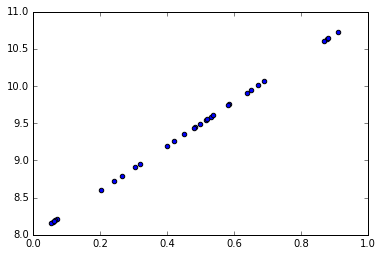

In [21]:
plt.scatter(x,y)

In [22]:
def sse(y,y_pred):return ((y-y_pred)**2).sum()
def loss(y,a,b,x):return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x):return np.sqrt(loss(y,a,b,x)/n)

In [23]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.8992

In [25]:
lr=0.01
#d[y-(a*x+b)**2,b] = 2 (b + ax -y) = 2 (y_pred - y)
#d[y-(a*x+b)**2,a] = 2 x (b + ax -y) = x *dy/db

In [26]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()
    

In [29]:
import matplotlib.animation as animation
print(animation.writers.list())

[u'imagemagick_file', u'imagemagick']


In [33]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval=100)
#ani

In [36]:
path = '/home/irashadow/python_workspace/deep_learning_workspace/'
ani.save('MovWave.mpeg', writer="ffmpeg", extra_args=['--verbose-debug'])

RuntimeError: Error creating movie, return code: 1 Try running with --verbose-debug